<a href="https://colab.research.google.com/github/rahul-727/AML-Lab_Work/blob/main/2348544_Program6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the following datasets from sklearn Library

* Breast Cancer dataset
* Iris Dataset
* Diabetes Dataset

* Apply PCA find principal components and project in the lower dimensions
* Print the variance of the coefficients
* Apply LDA. Project the reduced dimensions.
* Apply KNN, Decision Tree, Random Forest classifiers for all three datasets before and after
dimensionality reduction.
* Provide comparative analysis for all three datasets, in terms of all possible metrics
* Provide conceptual interpretation of the results obtained




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer, load_iris, load_diabetes
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
breast_cancer = load_breast_cancer()

iris = load_iris()

diabetes = pd.read_csv('/content/diabetes.csv')

In [3]:
breast_cancer_df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Function to train and evaluate each classifier for the 3 data

In [6]:
def train_and_evaluate(X_train, X_test, y_train, y_test, classifier):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-Score: {f1:.2f}')
    print('Confusion Matrix:')
    print(cm)
    print('\n')

# Function to print the results of each classifier

In [7]:
def print_results(X_train, X_test, y_train, y_test, classifiers):
    for name, clf in classifiers.items():
        print(f'{name}')
        train_and_evaluate(X_train, X_test, y_train, y_test, clf)

# Apply KNN, Decision Tree, Random Forest classifiers for the breast cancer dataset before dimensionality reduction

In [8]:
X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(
    breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=42
)

classifiers_bc = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier()
}

print('\nResults for Breast Cancer dataset:')
print_results(X_bc_train, X_bc_test, y_bc_train, y_bc_test, classifiers_bc)


Results for Breast Cancer dataset:
KNN
Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1-Score: 0.96
Confusion Matrix:
[[38  5]
 [ 0 71]]


Decision Tree
Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1-Score: 0.95
Confusion Matrix:
[[40  3]
 [ 3 68]]


Random Forest
Accuracy: 0.96
Precision: 0.97
Recall: 0.96
F1-Score: 0.96
Confusion Matrix:
[[40  3]
 [ 1 70]]





KNN
> *   KNN achieved high accuracy, precision, recall, and F1-Score.
The confusion matrix indicates that there are 38 true negatives, 71 true positives (TP), 5 false positives (FP), and 0 false negatives (FN).

Decision tree
> * Decision Tree achieved slightly lower accuracy compared to KNN.

Random Forest
>* Random Forest performed similarly to KNN with high accuracy, precision, recall, and F1-Score.

The classifiers (KNN, Decision Tree, and Random Forest) are performing well on the Breast Cancer dataset.
Random Forest and KNN achieved the highest precision, indicating a good balance between true positives and false positives.





In [9]:
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42
)

classifiers_iris = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

print('\nResults for Iris dataset:')
print_results(X_iris_train, X_iris_test, y_iris_train, y_iris_test, classifiers_iris)


Results for Iris dataset:
KNN
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Decision Tree
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Random Forest
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]




The classifiers (KNN, Decision Tree, and Random Forest) achieved exceptional performance on the Iris dataset.

In [10]:
X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(
    diabetes.drop('Outcome', axis=1), diabetes['Outcome'], test_size=0.2, random_state=42
)

classifiers_diabetes = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

print('\nResults for Diabetes dataset:')
print_results(X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test, classifiers_diabetes)


Results for Diabetes dataset:
KNN
Accuracy: 0.66
Precision: 0.67
Recall: 0.66
F1-Score: 0.67
Confusion Matrix:
[[70 29]
 [23 32]]


Decision Tree
Accuracy: 0.75
Precision: 0.76
Recall: 0.75
F1-Score: 0.75
Confusion Matrix:
[[75 24]
 [15 40]]


Random Forest
Accuracy: 0.72
Precision: 0.72
Recall: 0.72
F1-Score: 0.72
Confusion Matrix:
[[77 22]
 [21 34]]




KNN
> The confusion matrix indicates that there are a significant number of false positives and false negatives. This suggests that the KNN model struggles to correctly classify instances, leading to a relatively low accuracy.

Decision Tree
> The Decision Tree model performs better than KNN

Random Forest
> Random Forest performs similarly to the Decision Tree.









# Apply pca and lda for the datasets and then applying knn,decision and random forest

Apply pca for breast_cancer data

In [11]:
n_components_bc_pca = 2
breast_cancer_scaler = StandardScaler().fit_transform(breast_cancer.data)
pca_bc = PCA(n_components=n_components_bc_pca)
pca_result_bc = pca_bc.fit_transform(breast_cancer_scaler)

print(f'\nVariance of coefficients for Breast Cancer dataset after PCA ({n_components_bc_pca} components):')
print(pca_bc.explained_variance_ratio_)


Variance of coefficients for Breast Cancer dataset after PCA (2 components):
[0.44272026 0.18971182]


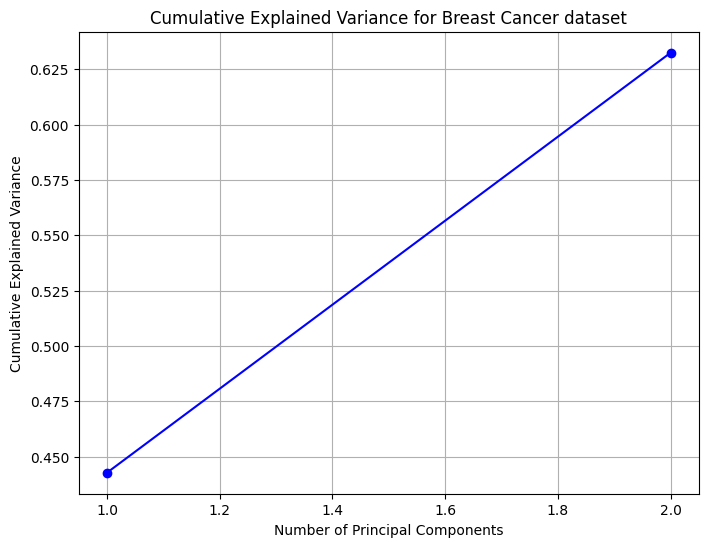

In [12]:
cumulative_explained_variance_bc = np.cumsum(pca_bc.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, n_components_bc_pca + 1), cumulative_explained_variance_bc, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance for Breast Cancer dataset')
plt.grid(True)
plt.show()

The cumulative explained variance is a measure of how much of the variance in the data can be explained by a certain number of principal components. Principal components are new, uncorrelated variables that are created by combining the original variables in the data.

This graph suggests that the first few principal components capture the most important patterns in the data

Apply LDA for Breast Cancer dataset

LDA

> * Linear Discriminant Analysis (LDA) is a dimensionality reduction and classification technique used in machine learning and statistics
> * The primary goal of LDA is to maximize the separation between multiple classes in the feature space while minimizing the variance within each class.
> *  LDA provides a way to reduce the dimensionality of the input features while preserving the discriminatory information between classes. It transforms the original features into a new set of features, known as discriminant functions or linear discriminants.




In [13]:
n_components_lda_bc = 1
lda_bc_original = LinearDiscriminantAnalysis(n_components=n_components_lda_bc)
lda_result_bc_original = lda_bc_original.fit_transform(breast_cancer_scaler, breast_cancer.target)

# 2D scatter plot for Breast Cancer dataset after LDA

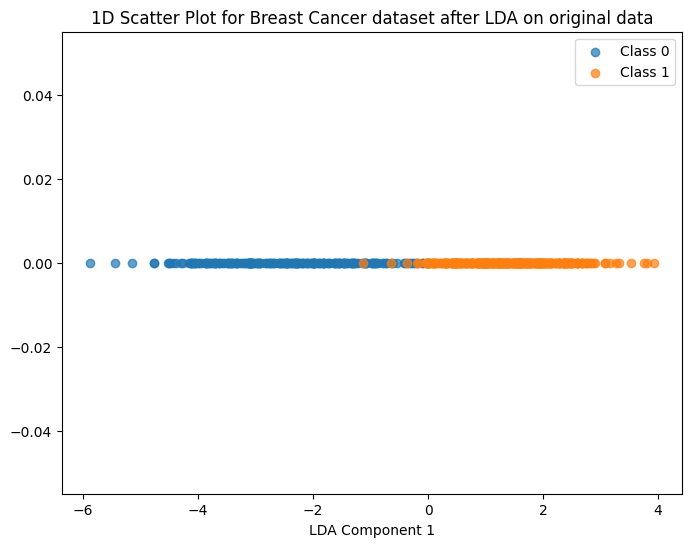

In [14]:
plt.figure(figsize=(8, 6))
for label in np.unique(breast_cancer.target):
    plt.scatter(lda_result_bc_original[breast_cancer.target == label], np.zeros_like(lda_result_bc_original[breast_cancer.target == label]),
                label=f'Class {label}', alpha=0.7)

plt.xlabel('LDA Component 1')
plt.title('1D Scatter Plot for Breast Cancer dataset after LDA on original data')
plt.legend()
plt.show()

Train and evaluate classifiers for Breast Cancer dataset after PCA

In [15]:
X_bc_pca_train, X_bc_pca_test, y_bc_pca_train, y_bc_pca_test = train_test_split(
    breast_cancer_scaler, breast_cancer.target, test_size=0.2, random_state=42
)

classifiers_bc_pca = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

print('\nResults for Breast Cancer dataset after PCA:')
print_results(X_bc_pca_train, X_bc_pca_test, y_bc_pca_train, y_bc_pca_test, classifiers_bc_pca)


Results for Breast Cancer dataset after PCA:
KNN
Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1-Score: 0.95
Confusion Matrix:
[[40  3]
 [ 3 68]]


Decision Tree
Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1-Score: 0.95
Confusion Matrix:
[[40  3]
 [ 3 68]]


Random Forest
Accuracy: 0.96
Precision: 0.97
Recall: 0.96
F1-Score: 0.96
Confusion Matrix:
[[40  3]
 [ 1 70]]




Train and evaluate classifiers for Breast Cancer dataset after LDA

In [18]:
X_bc_lda_train, X_bc_lda_test, y_bc_lda_train, y_bc_lda_test = train_test_split(
    breast_cancer_scaler, breast_cancer.target, test_size=0.2, random_state=42
)

classifiers_bc_lda_original = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

print('\nResults for Breast Cancer dataset after LDA on original data:')
print_results(X_bc_lda_train, X_bc_lda_test, y_bc_lda_train, y_bc_lda_test, classifiers_bc_lda_original)


Results for Breast Cancer dataset after LDA on original data:
KNN
Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1-Score: 0.95
Confusion Matrix:
[[40  3]
 [ 3 68]]


Decision Tree
Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1-Score: 0.95
Confusion Matrix:
[[40  3]
 [ 3 68]]


Random Forest
Accuracy: 0.96
Precision: 0.97
Recall: 0.96
F1-Score: 0.96
Confusion Matrix:
[[40  3]
 [ 1 70]]




after applying PCA and LDA separatively on the original data the two dimentionality reductiont techniques has similar results. performance of the model has increased, especially in the case of Random Forest where there is a notable enhancement in accuracy and recall.

Apply PCA for Iris dataset

In [19]:
n_components_iris_pca = 2
iris_scaler = StandardScaler().fit_transform(iris.data)
pca_iris = PCA(n_components=n_components_iris_pca)
pca_result_iris = pca_iris.fit_transform(iris_scaler)

print(f'\nVariance of coefficients for Iris dataset after PCA ({n_components_iris_pca} components):')
print(pca_iris.explained_variance_ratio_)


Variance of coefficients for Iris dataset after PCA (2 components):
[0.72962445 0.22850762]


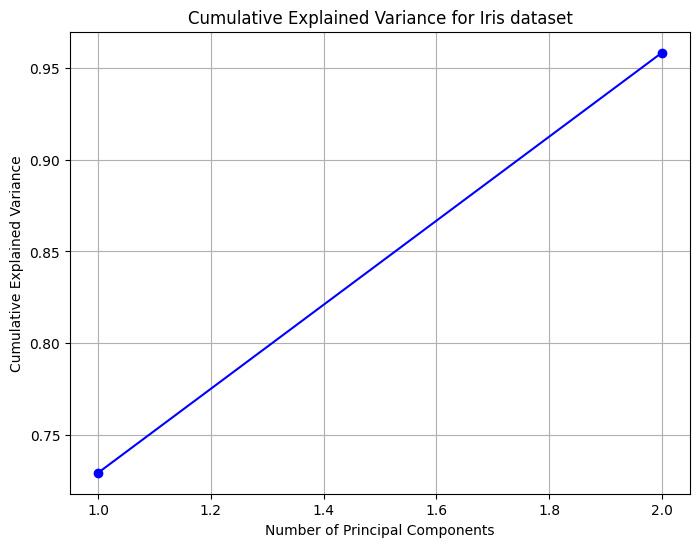

In [20]:
cumulative_explained_variance_iris = np.cumsum(pca_iris.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, n_components_iris_pca + 1), cumulative_explained_variance_iris, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance for Iris dataset')
plt.grid(True)
plt.show()

Apply LDA for Iris dataset

In [22]:
n_components_lda_iris = 2
lda_iris_original = LinearDiscriminantAnalysis(n_components=n_components_lda_iris)
lda_result_iris_original = lda_iris_original.fit_transform(iris_scaler, iris.target)

# 2D scatter plot for iris dataset after LDA

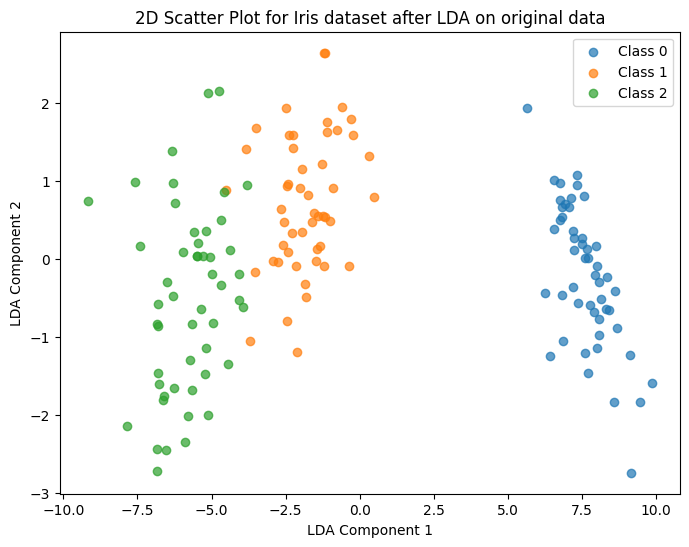

In [23]:
plt.figure(figsize=(8, 6))
for label in np.unique(iris.target):
    plt.scatter(lda_result_iris_original[iris.target == label, 0], lda_result_iris_original[iris.target == label, 1],
                label=f'Class {label}', alpha=0.7)

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('2D Scatter Plot for Iris dataset after LDA on original data')
plt.legend()
plt.show()


Train and evaluate classifiers for Iris dataset after PCA

In [24]:
X_iris_pca_train, X_iris_pca_test, y_iris_pca_train, y_iris_pca_test = train_test_split(
    iris_scaler, iris.target, test_size=0.2, random_state=42
)

classifiers_iris_pca = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

print('\nResults for Iris dataset after PCA:')
print_results(X_iris_pca_train, X_iris_pca_test, y_iris_pca_train, y_iris_pca_test, classifiers_iris_pca)



Results for Iris dataset after PCA:
KNN
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Decision Tree
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Random Forest
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]




Train and evaluate classifiers for Iris dataset after LDA

In [25]:
X_iris_lda_train, X_iris_lda_test, y_iris_lda_train, y_iris_lda_test = train_test_split(
    iris_scaler, iris.target, test_size=0.2, random_state=42
)

classifiers_iris_lda_original = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

print('\nResults for Iris dataset after LDA on original data:')
print_results(X_iris_lda_train, X_iris_lda_test, y_iris_lda_train, y_iris_lda_test, classifiers_iris_lda_original)


Results for Iris dataset after LDA on original data:
KNN
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Decision Tree
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Random Forest
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]




All the models achieved perfect results in case of both pca and lda applied data

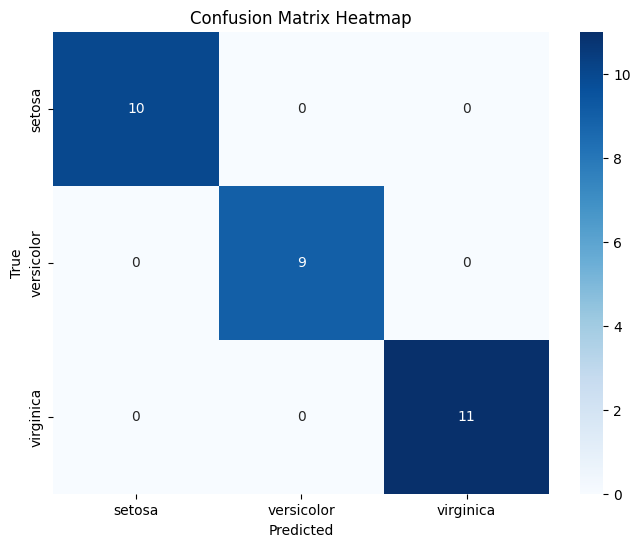

In [27]:
y_pred_iris_pca_lda = classifiers_iris_lda_original['Random Forest'].predict(X_iris_pca_test)
class_names_iris = iris.target_names
plot_confusion_matrix_heatmap(y_iris_pca_test, y_pred_iris_pca_lda, class_names_iris)


Apply PCA for Diabetes dataset

In [28]:
n_components_diabetes_pca = 2

diabetes_scaler = StandardScaler().fit_transform(diabetes.drop('Outcome', axis=1))
pca_diabetes = PCA(n_components=n_components_diabetes_pca)
pca_result_diabetes = pca_diabetes.fit_transform(diabetes_scaler)

print(f'\nVariance of coefficients for Diabetes dataset after PCA ({n_components_diabetes_pca} components):')
print(pca_diabetes.explained_variance_ratio_)



Variance of coefficients for Diabetes dataset after PCA (2 components):
[0.26179749 0.21640127]


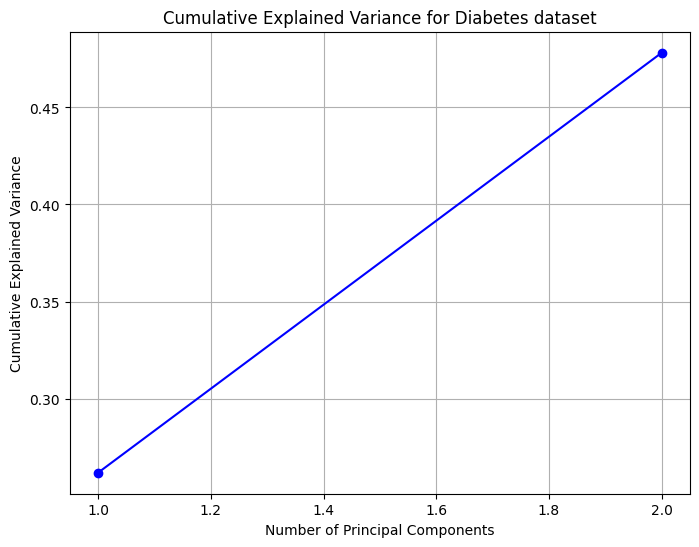

In [29]:
cumulative_explained_variance_diabetes = np.cumsum(pca_diabetes.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, n_components_diabetes_pca + 1), cumulative_explained_variance_diabetes, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance for Diabetes dataset')
plt.grid(True)
plt.show()


Apply LDA for Diabetes dataset

In [30]:
n_components_lda_diabetes = 1
lda_diabetes_original = LinearDiscriminantAnalysis(n_components=n_components_lda_diabetes)
lda_result_diabetes_original = lda_diabetes_original.fit_transform(diabetes_scaler, diabetes['Outcome'])

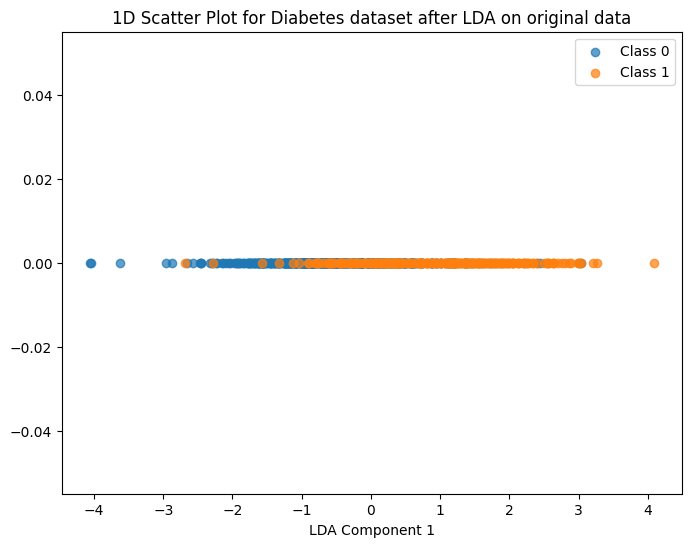

In [31]:
plt.figure(figsize=(8, 6))
for label in np.unique(diabetes['Outcome']):
    plt.scatter(lda_result_diabetes_original[diabetes['Outcome'] == label], np.zeros_like(lda_result_diabetes_original[diabetes['Outcome'] == label]),
                label=f'Class {label}', alpha=0.7)

plt.xlabel('LDA Component 1')
plt.title('1D Scatter Plot for Diabetes dataset after LDA on original data')
plt.legend()
plt.show()


Train and evaluate classifiers for Diabetes dataset after PCA

In [32]:
X_diabetes_pca_train, X_diabetes_pca_test, y_diabetes_pca_train, y_diabetes_pca_test = train_test_split(
    diabetes_scaler, diabetes['Outcome'], test_size=0.2, random_state=42
)

classifiers_diabetes_pca = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

print('\nResults for Diabetes dataset after PCA:')
print_results(X_diabetes_pca_train, X_diabetes_pca_test, y_diabetes_pca_train, y_diabetes_pca_test, classifiers_diabetes_pca)


Results for Diabetes dataset after PCA:
KNN
Accuracy: 0.69
Precision: 0.68
Recall: 0.69
F1-Score: 0.68
Confusion Matrix:
[[79 20]
 [28 27]]


Decision Tree
Accuracy: 0.75
Precision: 0.76
Recall: 0.75
F1-Score: 0.75
Confusion Matrix:
[[75 24]
 [15 40]]


Random Forest
Accuracy: 0.73
Precision: 0.73
Recall: 0.73
F1-Score: 0.73
Confusion Matrix:
[[78 21]
 [21 34]]




Train and evaluate classifiers for Diabetes dataset after LDA

In [33]:
X_diabetes_lda_train, X_diabetes_lda_test, y_diabetes_lda_train, y_diabetes_lda_test = train_test_split(
    diabetes_scaler, diabetes['Outcome'], test_size=0.2, random_state=42
)

classifiers_diabetes_lda_original = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

print('\nResults for Diabetes dataset after LDA on original data:')
print_results(X_diabetes_lda_train, X_diabetes_lda_test, y_diabetes_lda_train, y_diabetes_lda_test, classifiers_diabetes_lda_original)


Results for Diabetes dataset after LDA on original data:
KNN
Accuracy: 0.69
Precision: 0.68
Recall: 0.69
F1-Score: 0.68
Confusion Matrix:
[[79 20]
 [28 27]]


Decision Tree
Accuracy: 0.75
Precision: 0.76
Recall: 0.75
F1-Score: 0.75
Confusion Matrix:
[[75 24]
 [15 40]]


Random Forest
Accuracy: 0.73
Precision: 0.73
Recall: 0.73
F1-Score: 0.73
Confusion Matrix:
[[78 21]
 [21 34]]




 The performance of KNN increased in case of both pca and lda

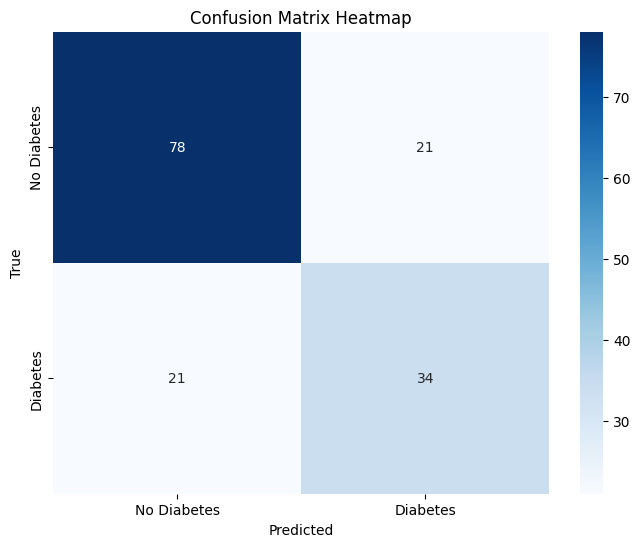

In [34]:
y_pred_diabetes_pca_lda = classifiers_diabetes_lda_original['Random Forest'].predict(X_diabetes_pca_test)
class_names_diabetes = ['No Diabetes', 'Diabetes']
plot_confusion_matrix_heatmap(y_diabetes_pca_test, y_pred_diabetes_pca_lda, class_names_diabetes)
